<a href="https://colab.research.google.com/github/ATrublie/Population-growth-forecasting/blob/main/Population_growth_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
PercGrow = pd.read_csv("/content/drive/MyDrive/Programs/Population/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv")
PercGrow.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,NaN
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,NaN
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,NaN


In [ ]:
IncomeGroup = pd.read_csv("/content/drive/MyDrive/Programs/Population/Metadata_Country_API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv")
IncomeGroup.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola


In [ ]:
PercGrow.shape

(264, 65)

In [ ]:
#Columns SP.POP.GROW and Indicator Code
print(f"{PercGrow[PercGrow.columns[2:4]].value_counts()}\n") #We can removes this columns because they have a unique value

# Year 1960 and 2020 NaN values 
print(PercGrow["1960"].isnull().sum()) # Many NaN values 
print(PercGrow["2020"].isnull().sum()) # Same 

# Then, we drop all these columns from our dataset 
PercGrow = PercGrow.drop(PercGrow.columns[2:4],axis=1)
PercGrow = PercGrow.drop(["1960","2020"],axis=1)
PercGrow.head()

Indicator Name                Indicator Code
Population growth (annual %)  SP.POP.GROW       264
dtype: int64

264
264


,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,5.198287,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,3.431725,3.080122,2.905118,3.153934,3.524383,3.896261,4.213953,4.384243,4.401653,4.339443,4.208398,4.081770,4.003002,3.915665,3.854362,3.889679,3.837472,3.476101,2.759621,1.854203,0.795574,-0.051287,-0.288007,0.354831,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,0.714098,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [ ]:
PercGrow[PercGrow.columns[5:-1]].isnull().sum()

1964    4
1965    4
1966    4
1967    4
1968    4
1969    4
1970    4
1971    4
1972    4
1973    4
1974    4
1975    4
1976    4
1977    4
1978    4
1979    4
1980    4
1981    4
1982    4
1983    4
1984    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    2
1997    2
1998    2
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
dtype: int64

In [ ]:
PercGrow = PercGrow.drop(PercGrow[PercGrow["1961"].isnull() == True].index, axis=0)
PercGrow[PercGrow.columns[5:-1]].isnull().sum()
PercGrow = PercGrow.fillna(0)

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

url = "https://www.bluemarblecitizen.com/world-population/1961"

try:
    page=requests.get(url)
except:
    print("Problem with the request")

soup=BeautifulSoup(page.content,"html.parser")
results = soup.find_all(class_="popTable")

def cleanhtml(raw_html):
    return re.sub(re.compile('<.*?>'), '/', raw_html).split("//")[1:-1]

dataset = []

for table in results:
    job_section = table.find_all("tr")
    for job in job_section:
        scapped = [item.replace("/","") for item in cleanhtml(str(job))[1:3]] 
        if scapped not in dataset:
            dataset.append(scapped)

d = {str(PercGrow.columns[0]): [item[0] for item in dataset[1:]], 'Population_1961': [int(item[1].replace(",","")) for item in dataset[1:]]}
Population_size_1961 = pd.DataFrame(data=d)
Population_size_1961.head()

,Country Name,Population_1961
0,China,645409760
1,India,454425502
2,United States,182992000
3,Russia,121324346
4,Indonesia,102381963


In [ ]:
#Left Join on Country Name
TestNaN = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='left')
TestNaN[TestNaN.Population_1961.isnull() == True]["Country Name"].unique()

array(['Arab World', 'Bahamas, The', 'Brunei Darussalam',
       'Central Europe and the Baltics', 'Channel Islands',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Caribbean small states',
       'Czech Republic', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Egypt, Arab Rep.', 'Euro area',
       'European Union', 'Fragile and conflict affected situations',
       'Micronesia, Fed. Sts.', 'Gambia, The', 'High income',
       'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Iran, Islamic Rep.', 'Kyrgyz Republic',
       'St. Kitts and Nevis', 'Korea, Rep.',
       'Latin America & Caribbean (excluding high income)', 'Lao PDR',
       'St. Lucia', 'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income

# So if we only use the countries that have data for their population size, we already lose 75 of them.
**bold text**We can also see that we have a line : "World"!
# **Quite interesting, so we will remove it from the data set.**

In [ ]:
World = PercGrow[PercGrow["Country Name"] == "World"].copy()
World["Population_1961"] = 3091843507
World

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Population_1961
257,World,WLD,1.35392,1.724198,2.083131,2.052951,2.054892,2.108305,2.046206,2.032273,2.113693,2.090396,2.106974,2.031203,1.966566,1.945908,1.865028,1.78577,1.74949,1.747865,1.761919,1.748543,1.764333,1.800079,1.783946,1.746758,1.748568,1.770219,1.78321,1.770396,1.738764,1.735637,1.666437,1.57011,1.561925,1.521905,1.51023,1.45329,1.427218,1.39216,1.3518,1.323073,1.297594,1.276806,1.261478,1.254263,1.246927,1.243693,1.235741,1.239313,1.223285,1.203252,1.17004,1.183831,1.183727,1.179816,1.16812,1.162578,1.14204,1.103609,1.074675,3091843507


# In order to know the evolution of the population of each selected countries, we multiply the population of the previous year with the growth percentage of the current year to calculate the population growth.

❗ Warning ❗: You have to be careful to round the result to avoid having partial humans...

❗ Warning 2 ❗: The results are not 100% accurate but are still usable for our analysis.

In [ ]:
PopulationSize = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='inner')

for col in PopulationSize.columns[3:-1]:
    PopulationSize[f"Population_{col}"] = round(PopulationSize[f"Population_{int(col)-1}"] + PopulationSize[f"Population_{int(col)-1}"] * (PopulationSize[col]/100))

PopulationSize.head(5)

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,Population_1980,Population_1981,Population_1982,Population_1983,Population_1984,Population_1985,Population_1986,Population_1987,Population_1988,Population_1989,Population_1990,Population_1991,Population_1992,Population_1993,Population_1994,Population_1995,Population_1996,Population_1997,Population_1998,Population_1999,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,Population_2006,Population_2007,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,...,61774.0,62256.0,63051.0,63925.0,64574.0,64769.0,64375.0,63536.0,62756.0,62708.0,63845.0,66336.0,69945.0,74190.0,78364.0,81982.0,84866.0,87132.0,88974.0,90718.0,92582.0,94643.0,96753.0,98794.0,100530.0,101839.0,102653.0,103047.0,103185.0,103284.0,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,...,14568397.0,14365380.0,14046518.0,13665443.0,13297094.0,13003977.0,12782029.0,12637842.0,12652504.0,12922806.0,13501347.0,14432961.0,15666419.0,17043636.0,18349141.0,19428852.0,20209789.0,20742628.0,21146553.0,21605526.0,22248302.0,23116610.0,24156099.0,25283793.0,26376442.0,27347816.0,28165646.0,28868053.0,29522860.0,30230529.0,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,...,7200591.0,7454314.0,7719157.0,7994525.0,8279469.0,8573214.0,8875994.0,9187932.0,9507893.0,9834435.0,10166689.0,10504676.0,10849262.0,11201499.0,11562876.0,11934837.0,12318451.0,12714775.0,13125328.0,13551802.0,13995922.0,14457955.0,14939297.0,15444068.0,15977354.0,16542562.0,17141332.0,17772242.0,18431687.0,19114374.0,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,...,2683058.0,2736799.0,2794635.0,2853906.0,2913950.0,2973861.0,3031352.0,3091889.0,3150224.0,3234898.0,3293097.0,3273246.0,3253396.0,3233545.0,3213695.0,3193844.0,3173994.0,3154143.0,3134293.0,3114442.0,3094592.0,3065550.0,3056357.0,3044922.0,3032196.0,3016678.0,2997645.0,2974991.0,2952163.0,2932269.0,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,2858710.0
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.75087

In [ ]:
df = pd.merge(IncomeGroup[IncomeGroup.columns[0:3]],PopulationSize,on="Country Code",how='inner')
df.head(5)

,Country Code,Region,IncomeGroup,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,Population_1980,Population_1981,Population_1982,Population_1983,Population_1984,Population_1985,Population_1986,Population_1987,Population_1988,Population_1989,Population_1990,Population_1991,Population_1992,Population_1993,Population_1994,Population_1995,Population_1996,Population_1997,Population_1998,Population_1999,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,Population_2006,Population_2007,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,ABW,Latin America & Caribbean,High income,Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,...,61774.0,62256.0,63051.0,63925.0,64574.0,64769.0,64375.0,63536.0,62756.0,62708.0,63845.0,66336.0,69945.0,74190.0,78364.0,81982.0,84866.0,87132.0,88974.0,90718.0,92582.0,94643.0,96753.0,98794.0,100530.0,101839.0,102653.0,103047.0,103185.0,103284.0,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,AFG,South Asia,Low income,Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,...,14568397.0,14365380.0,14046518.0,13665443.0,13297094.0,13003977.0,12782029.0,12637842.0,12652504.0,12922806.0,13501347.0,14432961.0,15666419.0,17043636.0,18349141.0,19428852.0,20209789.0,20742628.0,21146553.0,21605526.0,22248302.0,23116610.0,24156099.0,25283793.0,26376442.0,27347816.0,28165646.0,28868053.0,29522860.0,30230529.0,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,...,7200591.0,7454314.0,7719157.0,7994525.0,8279469.0,8573214.0,8875994.0,9187932.0,9507893.0,9834435.0,10166689.0,10504676.0,10849262.0,11201499.0,11562876.0,11934837.0,12318451.0,12714775.0,13125328.0,13551802.0,13995922.0,14457955.0,14939297.0,15444068.0,15977354.0,16542562.0,17141332.0,17772242.0,18431687.0,19114374.0,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,ALB,Europe & Central Asia,Upper middle income,Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,...,2683058.0,2736799.0,2794635.0,2853906.0,2913950.0,2973861.0,3031352.0,3091889.0,3150224.0,3234898.0,3293097.0,3273246.0,3253396.0,3233545.0,3213695.0,3193844.0,3173994.0,3154143.0,3134293.0,3114442.0,3094592.0,3065550.0,3056357.0,3044922.0,3032196.0,3016678.0,2997645.0,2974991.0,2952163.0,2932269.0,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colunms = World.columns[3:-1].copy()

for col in colunms:
    World[f"Population_{col}"] = round(World[f"Population_{int(col)-1}"] + World[f"Population_{int(col)-1}"] * (World[col]/100))

    World[World.columns[2:61]].values[0]

[Text(0, 0, '1961'),
 Text(0, 0, '1963'),
 Text(0, 0, '1965'),
 Text(0, 0, '1967'),
 Text(0, 0, '1969'),
 Text(0, 0, '1971'),
 Text(0, 0, '1973'),
 Text(0, 0, '1975'),
 Text(0, 0, '1977'),
 Text(0, 0, '1979'),
 Text(0, 0, '1981'),
 Text(0, 0, '1983'),
 Text(0, 0, '1985'),
 Text(0, 0, '1987'),
 Text(0, 0, '1989'),
 Text(0, 0, '1991'),
 Text(0, 0, '1993'),
 Text(0, 0, '1995'),
 Text(0, 0, '1997'),
 Text(0, 0, '1999'),
 Text(0, 0, '2001'),
 Text(0, 0, '2003'),
 Text(0, 0, '2005'),
 Text(0, 0, '2007'),
 Text(0, 0, '2009'),
 Text(0, 0, '2011'),
 Text(0, 0, '2013'),
 Text(0, 0, '2015'),
 Text(0, 0, '2017'),
 Text(0, 0, '2019')]

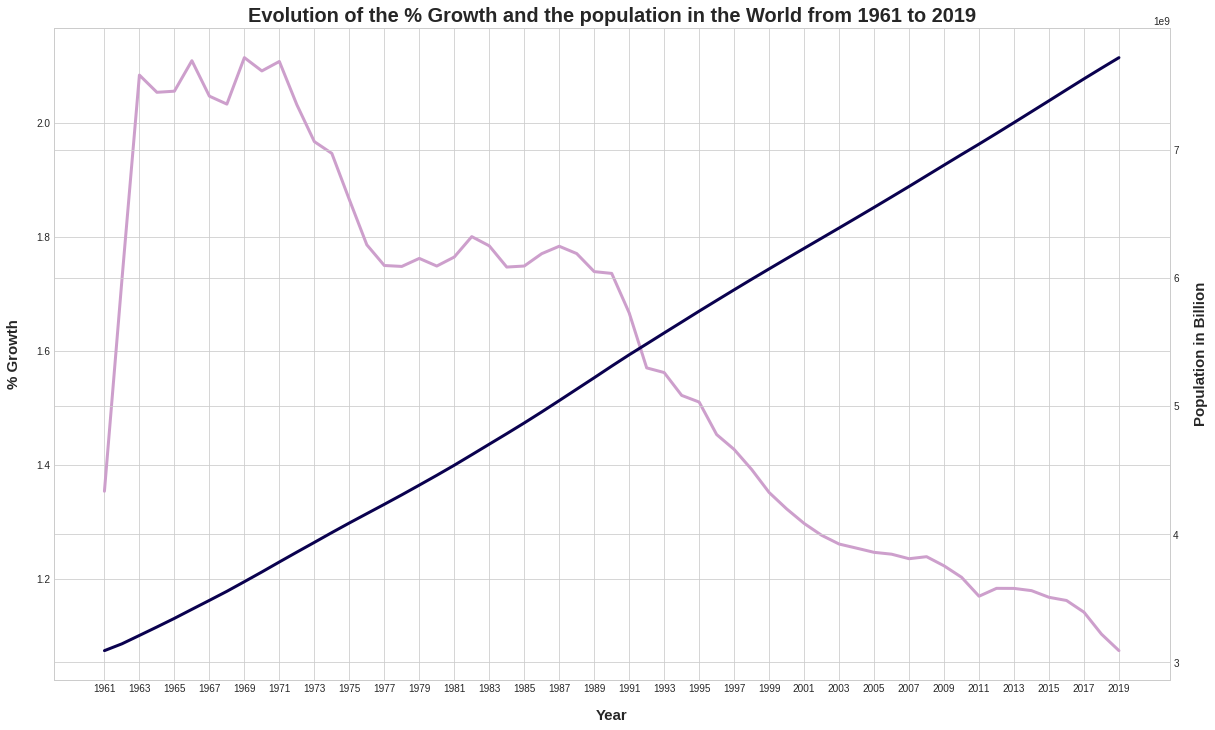

In [ ]:
#Set a figure 
plt.style.use('seaborn-whitegrid')
fig, ax_G = plt.subplots(figsize=[20,12])
ax_P = ax_G.twinx()
ax_G.set_xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
ax_P.set_ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_title("Evolution of the % Growth and the population in the World from 1961 to 2019",fontsize=20,fontweight=600)
ax_P.set_xticks([i*2 for i in range(0,30)])
ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in World.columns[2:61].tolist()],World[World.columns[2:61]].values[0],linewidth=3,label="% Growth",color = "#CD9FCC")
ax_P.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Population",color = "#0A014F")

ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])

In [ ]:
Evolution_by_region = df.groupby(["Region"]).mean()
Percentage_years_columns = Evolution_by_region.columns[0:59] #% growth columns 
Population_years_columns = Evolution_by_region.columns[59:] #population size columns 
Evolution_by_region

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,Population_1980,Population_1981,Population_1982,Population_1983,Population_1984,Population_1985,Population_1986,Population_1987,Population_1988,Population_1989,Population_1990,Population_1991,Population_1992,Population_1993,Population_1994,Population_1995,Population_1996,Population_1997,Population_1998,Population_1999,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,Population_2006,Population_2007,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2.615088,2.721297,2.758067,2.725930,2.609322,2.566872,2.427968,2.314403,2.403668,2.488723,2.548746,2.416222,2.267867,2.212129,1.969875,1.743355,1.615923,1.556669,1.645851,1.895451,2.282265,2.474858,2.466383,2.482757,2.401001,2.353683,2.406121,2.332464,2.230650,2.142023,1.925267,1.815352,1.695471,1.665574,1.637351,1.643299,1.566790,1.505814,1.338781,1.317416,...,4.950244e+07,5.024039e+07,5.105445e+07,5.186839e+07,5.264462e+07,5.344352e+07,5.429415e+07,5.519162e+07,5.609821e+07,5.698420e+07,5.784880e+07,5.867421e+07,5.944772e+07,6.019218e+07,6.093701e+07,6.167019e+07,6.238734e+07,6.309381e+07,6.377618e+07,6.441305e+07,6.501769e+07,6.560086e+07,6.615695e+07,6.668859e+07,6.720289e+07,6.771693e+07,6.822380e+07,6.871337e+07,6.920981e+07,6.969845e+07,7.018177e+07,7.065903e+07,7.114908e+07,7.164415e+07,7.214366e+07,7.264220e+07,7.315343e+07,7.366609e+07,7.412363e+07,7.453389e+07
Europe & Central Asia,1.639127,1.676346,1.649338,1.590681,1.532719,1.436181,1.396342,1.333351,1.257902,1.205030,1.202047,1.256716,1.199230,1.170582,1.150333,1.077533,0.976513,0.945201,0.939261,0.937784,0.921588,0.867349,0.852665,0.841451,0.834034,0.864840,0.908870,0.880532,0.765118,0.648564,0.529847,0.394854,0.357914,0.275670,0.177008,0.184997,0.228675,0.135683,0.103841,0.285454,...,1.232276e+07,1.240467e+07,1.247795e+07,1.254783e+07,1.261729e+07,1.268777e+07,1.276212e+07,1.283833e+07,1.291629e+07,1.299244e+07,1.306570e+07,1.313216e+07,1.319522e+07,1.325466e+07,1.329534e+07,1.332478e+07,1.335381e+07,1.338253e+07,1.340804e+07,1.343553e+07,1.346597e+07,1.349890e+07,1.354239e+07,1.360649e+07,1.365936e+07,1.372068e+07,1.378135e+07,1.384569e+07,1.391347e+07,1.398154e+07,1.404618e+07,1.408644e+07,1.415094e+07,1.422666e+07,1.430346e+07,1.437959e+07,1.445421e+07,1.452034e+07,1.458288e+07,1.464443e+07
Latin America & Caribbean,2.253311,2.210517,2.155360,2.102156,2.055885,2.001875,1.959895,1.930298,1.923506,1.907114,1.905012,1.848591,1.807920,1.817443,1.772053,1.722505,1.697338,1.665846,1.707253,1.762914,1.828283,1.891684,1.891770,1.854318,1.792438,1.705056,1.624258,1.573570,1.613710,1.706057,1.800575,1.874567,1.913470,1.871260,1.793913,1.724375,1.632961,1.499839,1.412529,1.378350,...,9.980258e+06,1.019758e+07,1.041782e+07,1.063998e+07,1.086278e+07,1.108529e+07,1.130703e+07,1.152798e+07,1.174821e+07,1.196796e+07,1.218736e+07,1.240593e+07,1.262344e+07,1.284013e+07,1.305590e+07,1.327065e+07,1.348465e+07,1.369716e+07,1.390714e+07,1.411377e+07,1.431631e+07,1.451435e+07,1.470805e+07,1.489796e+07,1.508524e+07,1.527061e+07,1.545424e+07,1.563619e+07,1.581668e+07,1.599569e+07,1.617019e+07,1.634663e+07,1.652094e+07,1.669514e+07,1.687101e+07,1.705025e+07,1.723391e+07,1.742025e+07,1.760395e+07,1.778461e+07
Middle East & North Africa,4.108606,4.419977,4.424852,4.405541,4.274520,4.107937,4.187468,4.109380,4.303763,4.572730,4.698929,4.669329,4.759546,4.690069,4.686093,4.645753,4.569146,4.481033,4.363633,4.211058,4.011052,3.935429,3.753128,3.549369,3.636132,3.591225,3.471213,3.340738,3.132569,2.962577,2.991541,2.855070,2.673970,2.474750,2.261158,2.160

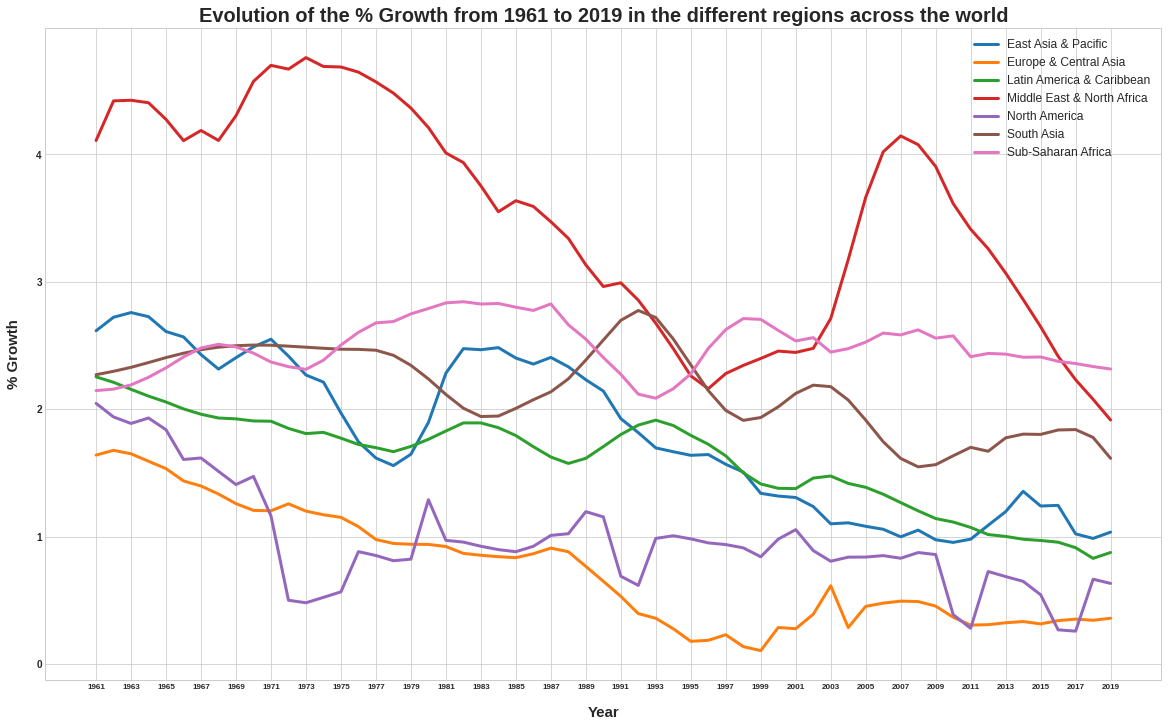

In [ ]:
#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.yticks(fontsize=10,fontweight=550) 
plt.xticks([i*2 for i in range(0,30)],fontsize=8,fontweight=550)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution of the % Growth from 1961 to 2019 in the different regions across the world",fontsize=20,fontweight=600)

for index in Evolution_by_region.index:
    plt.plot(Evolution_by_region[Percentage_years_columns].loc[index],label = index,linewidth=3)

plt.legend(fontsize=12)

In [ ]:
print("We can see that overall, the % of growth has decreased over the last 60 years !\n")
print(f"Decrease for each region from 1961 to 2019 : \n\n\n{Evolution_by_region['1961'] - Evolution_by_region['2019']}")
Evolution_by_region[["1961","2019"]]

We can see that overall, the % of growth has decreased over the last 60 years !

Decrease for each region from 1961 to 2019 : 


Region
East Asia & Pacific           1.580760
Europe & Central Asia         1.280836
Latin America & Caribbean     1.378774
Middle East & North Africa    2.194281
North America                 1.413818
South Asia                    0.656689
Sub-Saharan Africa           -0.169169
dtype: float64


,1961,2019
Region,,
East Asia & Pacific,2.615088,1.034327
Europe & Central Asia,1.639127,0.358291
Latin America & Caribbean,2.253311,0.874537
Middle East & North Africa,4.108606,1.914325
North America,2.045443,0.631625
South Asia,2.270356,1.613668
Sub-Saharan Africa,2.145534,2.314702


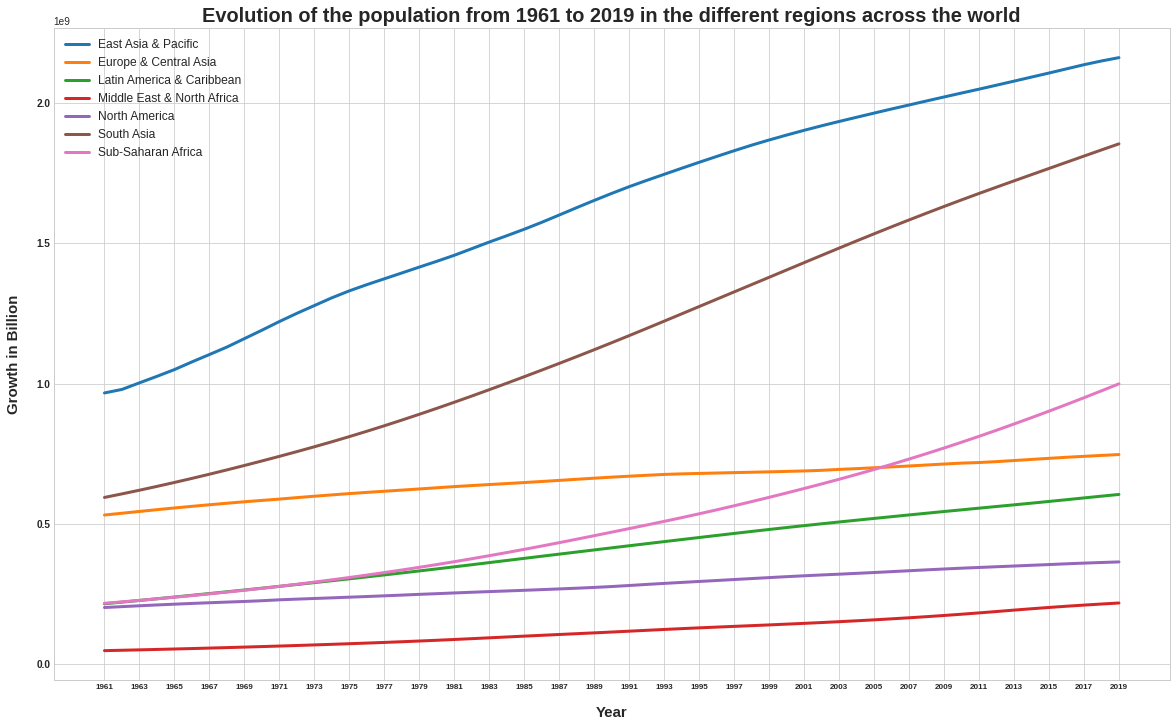

In [ ]:

#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.yticks(fontsize=10,fontweight=550) 
plt.xticks([i*2 for i in range(0,30)],labels=[1961+i*2 for i in range(0,30)],fontsize=8,fontweight=550)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Growth in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution of the population from 1961 to 2019 in the different regions across the world",fontsize=20,fontweight=600)

for index in Evolution_by_region.index:
    plt.plot(df.groupby(['Region']).sum()[Population_years_columns].loc[index],label = index,linewidth=3)

plt.legend(fontsize=12)

In [ ]:
print("On the contrary, despite a decrease of % of growth, the world population has increased for each region ! \n")
print(f"Population Evolution from 1961 to 2019 : \n\n\n{df.groupby(['Region']).sum()['Population_2019'] - df.groupby(['Region']).sum()['Population_1961']}")
df.groupby(["Region"]).sum()[["Population_1961","Population_2019"]]

On the contrary, despite a decrease of % of growth, the world population has increased for each region ! 

Population Evolution from 1961 to 2019 : 


Region
East Asia & Pacific           1.195135e+09
Europe & Central Asia         2.155857e+08
Latin America & Caribbean     3.896233e+08
Middle East & North Africa    1.698075e+08
North America                 1.625491e+08
South Asia                    1.260283e+09
Sub-Saharan Africa            7.822757e+08
dtype: float64


,Population_1961,Population_2019
Region,,
East Asia & Pacific,966347771,2.161483e+09
Europe & Central Asia,531280112,7.468658e+08
Latin America & Caribbean,215053386,6.046767e+08
Middle East & North Africa,47965036,2.177725e+08
North America,201672125,3.642212e+08
South Asia,593955746,1.854239e+09
Sub-Saharan Africa,216648225,9.989239e+08


In [ ]:
result = sum(df.groupby(["Region"]).sum()["Population_2019"].iloc[[0,5]])
print(f"If we add 'East Asia & Pacific' and 'South Asia', we can observe that a lot of people lives in these region :\n{result}")
print("Soit 4 billions peoples, more than half of the total earth population")

If we add 'East Asia & Pacific' and 'South Asia', we can observe that a lot of people lives in these region :
4015721464.0
Soit 4 billions peoples, more than half of the total earth population


In [ ]:
EastAsia = df[df["Region"] == 'East Asia & Pacific'].copy()
SouthAsia = df[df["Region"] == 'South Asia'].copy()
print(SouthAsia[SouthAsia["Population_2019"] == SouthAsia["Population_2019"].max()]["Country Name"])
print(EastAsia[EastAsia["Population_2019"] == EastAsia["Population_2019"].max()]["Country Name"])

79    India
Name: Country Name, dtype: object
33    China
Name: Country Name, dtype: object


In [ ]:
#Create datasets 
China = df[df["Country Name"] == "China"]
India = df[df["Country Name"] == "India"]

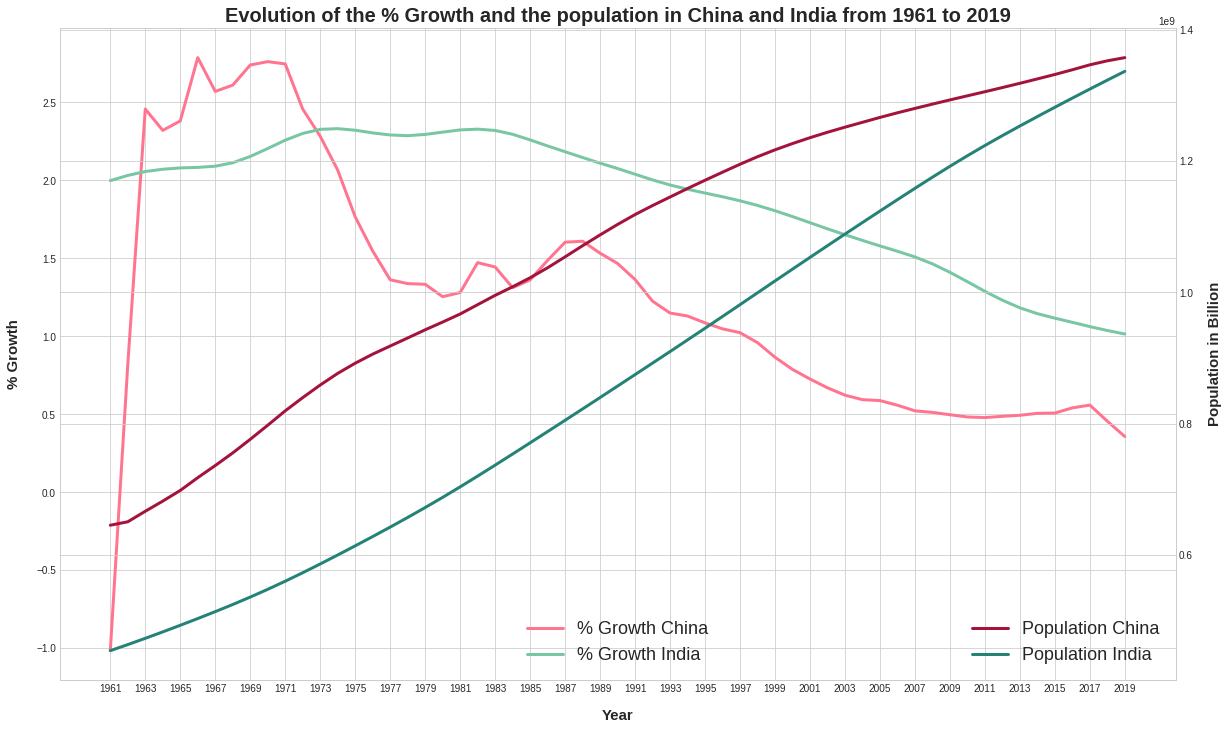

<Figure size 432x288 with 0 Axes>

In [ ]:
#Set a figure 
fig, ax_G = plt.subplots(figsize=[20,12])
ax_P = ax_G.twinx()
fig = plt.figure()
ax_G.set_xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
ax_P.set_ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_title("Evolution of the % Growth and the population in China and India from 1961 to 2019",fontsize=20,fontweight=600)
ax_P.set_xticks([i*2 for i in range(0,30)])
ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],China[China.columns[4:63]].values[0],linewidth=3,label="% Growth China",color = "#ff758f")
ax_P.plot([int(item[-4:]) for item in China.columns[63:].tolist()],China[China.columns[63:]].values[0],linewidth=3,label="Population China",color = "#a4133c")
ax_G.plot([int(item) for item in India.columns[4:63].tolist()],India[India.columns[4:63]].values[0],linewidth=3,label="% Growth India",color = "#78c6a3")
ax_P.plot([int(item[-4:]) for item in India.columns[63:].tolist()],India[India.columns[63:]].values[0],linewidth=3,label="Population India",color = "#248277")

ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G.legend(fontsize=18,loc=8)
ax_P.legend(fontsize=18,loc=4)

In [ ]:
Growth_AVG = df[df.columns[4:63]].mean()
Pop_AVG = df[df.columns[63:]].mean()

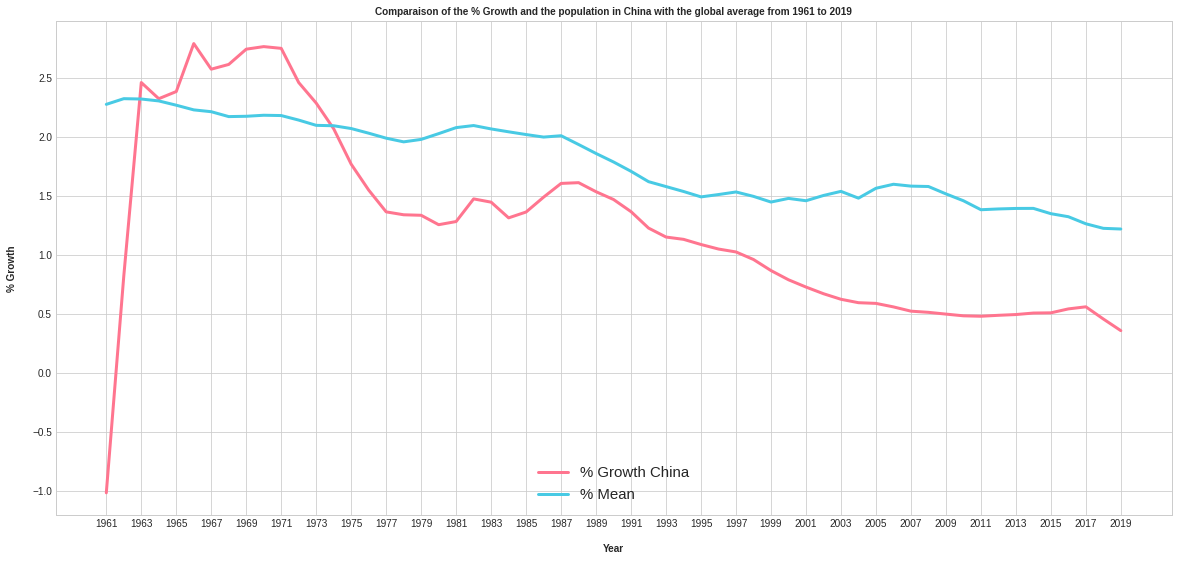

<Figure size 432x288 with 0 Axes>

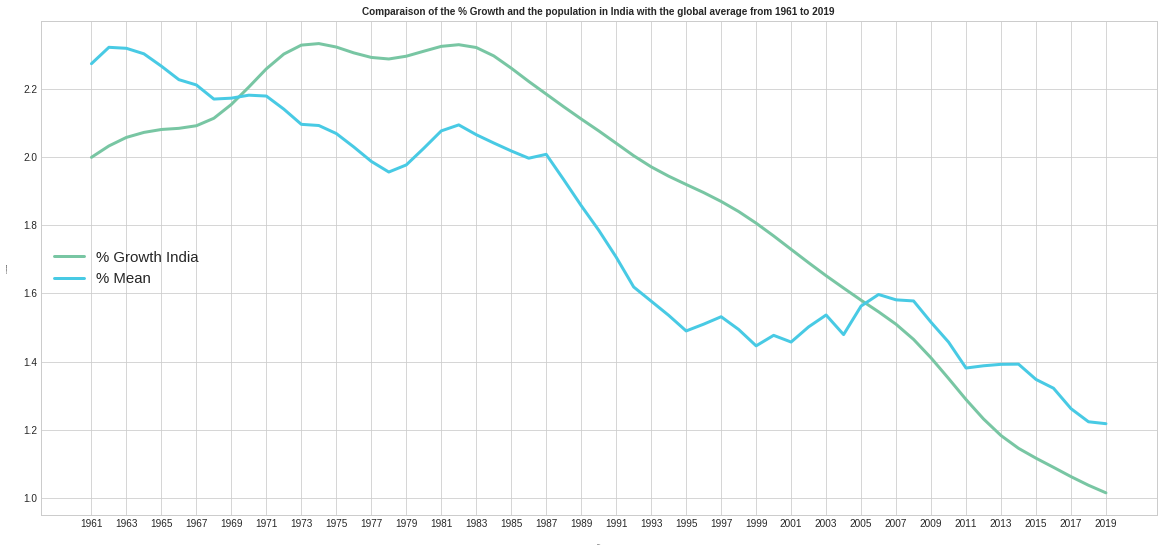

In [ ]:
plt.figure(figsize=[20,20])
ax_G = plt.subplot(211)

fig = plt.figure()
ax_G.set_xlabel("Year",fontsize=10,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=10,fontweight=550,labelpad=15)
ax_G.set_title("Comparaison of the % Growth and the population in China with the global average from 1961 to 2019",fontsize=10,fontweight=600)
ax_G.set_xticks([i*2 for i in range(0,30)])
ax_G.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],China[China.columns[4:63]].values[0],linewidth=3,label="% Growth China",color = "#ff758f")

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],df[df.columns[4:63]].mean(),linewidth=3,label="% Mean",color = "#48cae4")


ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G.legend(fontsize=15,loc=8)


#Set a figure 
plt.figure(figsize=[20,20])
ax_G2 = plt.subplot(212)

ax_G2.set_xlabel("Year",fontsize=2,fontweight=550,labelpad=15)
ax_G2.set_ylabel("% Growth",fontsize=2,fontweight=550,labelpad=15)
ax_G2.set_title("Comparaison of the % Growth and the population in India with the global average from 1961 to 2019",fontsize=10,fontweight=600)
ax_G2.set_xticks([i*2 for i in range(0,30)])
ax_G2.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G2.plot([int(item) for item in India.columns[4:63].tolist()],India[India.columns[4:63]].values[0],linewidth=3,label="% Growth India",color = "#78c6a3")

ax_G2.plot([int(item) for item in China.columns[4:63].tolist()],df[df.columns[4:63]].mean(),linewidth=3,label="% Mean",color = "#48cae4")

ax_G2.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G2.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G2.legend(fontsize=15,loc=6)

The graph above shows that China's % growth fell below the world average in 1975. 📆
In contrast, India's growth rate rose above the world average in 1969 and remained above it for more than 35 years (until 2005).

This highlights the significant population growth that India has undergone in recent years, and which risks becoming the most populous country in the world.
An important factor is the one-child policy, or Planned Parenthood policy, the public birth control policy implemented by the People's Republic of China from 1979 to 2015. 👨‍👩‍👧

This reinforces the fall in the % growth over this period.

# **4) Forecasting world % growth for next years**
Now that we are well advanced on the subject, we can now try to predict what might happen in 20, 30 or even 50 years.
We are going to use different forecasting methods on the global population, taking into account % growth and the world population.

Before that, we will convert the data into TimeSeries!

In [ ]:
PercentGrowth = pd.melt(World[World.columns[2:61]]).rename(columns={"variable" : "Year","value" : "PercGrowth"})
PercentGrowth["Year"] = PercentGrowth["Year"].map(lambda x : pd.to_datetime(f"{x}-12-31"))
PercentGrowth.head(5)

,Year,PercGrowth
0,1961-12-31,1.353920
1,1962-12-31,1.724198
2,1963-12-31,2.083131
3,1964-12-31,2.052951
4,1965-12-31,2.054892


# **Autoregression (AR)**
Autoregressive modeling is training a regression model on the value of response variable itself.
Autoregressive is made of the word, Auto and Regressive which represents the linear regression on itself (auto).
In context of time-series forecasting, autoregressive modeling will mean creating the model where the response variable Y will depend upon the previous values of Y at a pre-determined constant time lag. The time lag can be daily (or 2, 3, 4… days), weekly, monthly etc.

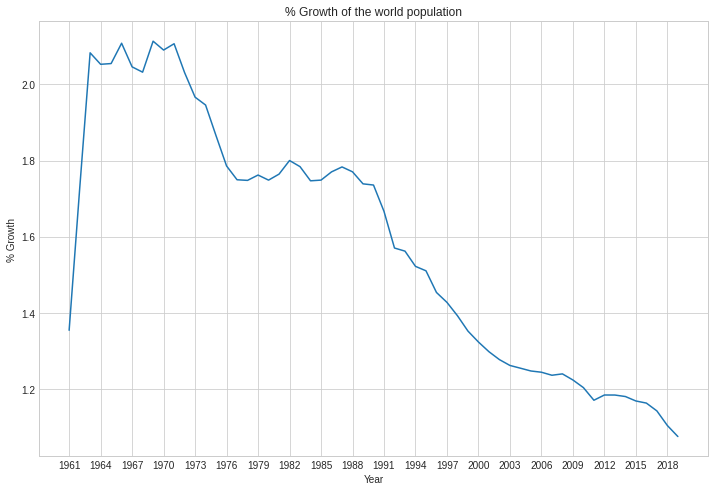

In [ ]:
plt.figure(figsize=[12,8])
plt.title("% Growth of the world population")
plt.xlabel("Year")
plt.ylabel("% Growth")
plt.xticks([i*3 for i in range(0,20)],labels = [1961 + i*3 for i in range(20)])
PercentGrowth['PercGrowth'].plot()

In [ ]:
!pip install statsmodels --upgrade

P-value:  0.9437518182894575 , then no stationarity.


<Figure size 864x576 with 0 Axes>

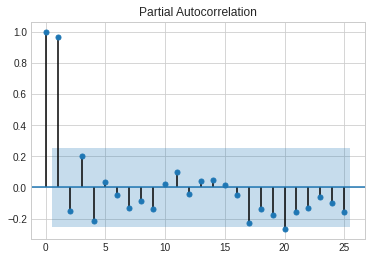

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Run the test
PG_stationarityTest = adfuller(PercentGrowth['PercGrowth'], autolag='AIC')

# Check the value of p-value
print("P-value: ", PG_stationarityTest[1],", then no stationarity.")

plt.figure(figsize=[12,8])
pacf = plot_pacf(PercentGrowth['PercGrowth'], lags=25)

# Create training and test data
train_data = PercentGrowth['PercGrowth'][:round(len(PercentGrowth['PercGrowth'])*0.8)]
test_data = PercentGrowth['PercGrowth'][round(len(PercentGrowth['PercGrowth'])*0.8):]

In [ ]:
# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=6).fit()
print(ar_model.summary())
plt.show()

                            AutoReg Model Results                             
Dep. Variable:             PercGrowth   No. Observations:                   47
Model:                     AutoReg(6)   Log Likelihood                  83.798
Method:               Conditional MLE   S.D. of innovations              0.031
Date:                Thu, 05 Aug 2021   AIC                             -6.535
Time:                        04:37:07   BIC                             -6.201
Sample:                             6   HQIC                            -6.414
                                   47                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0029      0.037      0.079      0.937      -0.070       0.076
PercGrowth.L1     1.2875      0.155      8.303      0.000       0.984       1.591
PercGrowth.L2    -0.3271      0.246     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


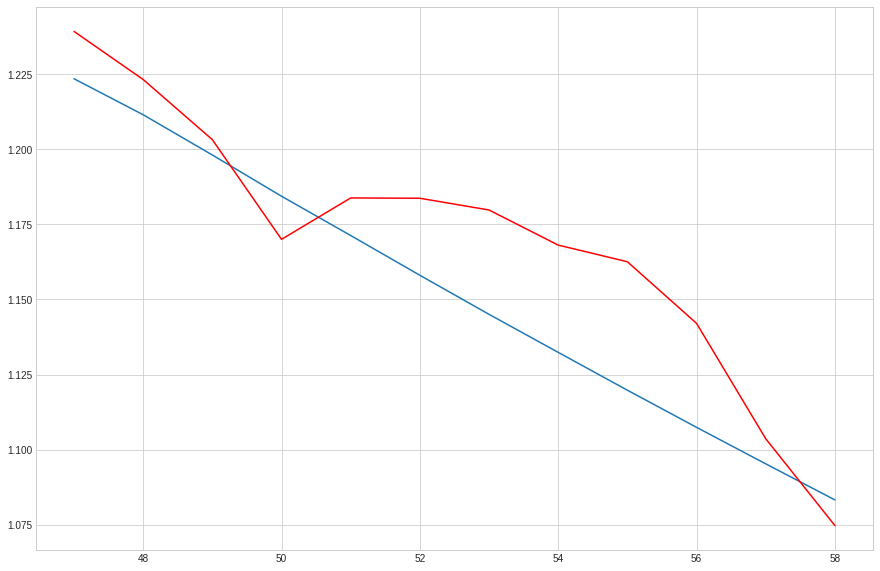

In [ ]:
# Make the predictions

plt.figure(figsize=[15,10])
pred = ar_model.predict(start=len(train_data), end=(len(PercentGrowth)-1), dynamic=False)

# Plot the prediction vs test data
plt.plot(pred)
plt.plot(test_data, color='red')

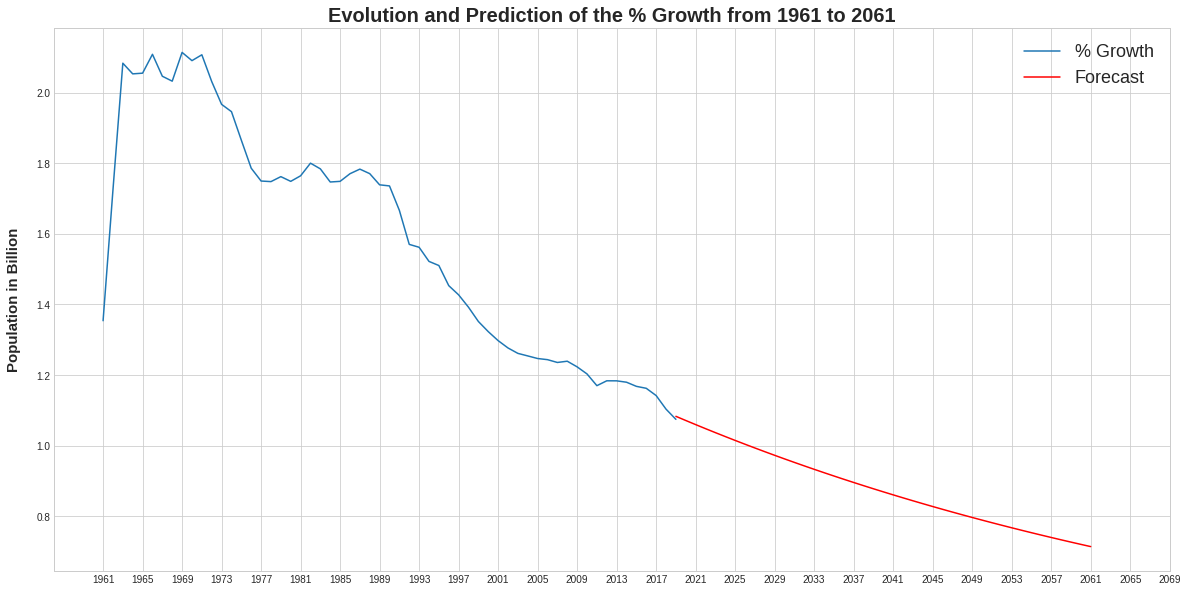

In [ ]:
# Make the predictions
plt.figure(figsize=[20,10])
plt.plot(PercentGrowth['PercGrowth'],label="% Growth")
pred = ar_model.predict(start=len(PercentGrowth)-1, end=(len(PercentGrowth)+41), dynamic=False)
plt.plot(pred,color='red',label="Forecast")
plt.xticks([i*4 for i in range(28)],labels = [1961 + i*4 for i in range(28)])
plt.ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the % Growth from 1961 to 2061",fontsize=20,fontweight=600)

plt.legend(fontsize=18)

In [ ]:
PopIni = World["Population_2019"].values[0]
Pred_pop_size = []

for percGrowth in pred:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size.append(PopIni)

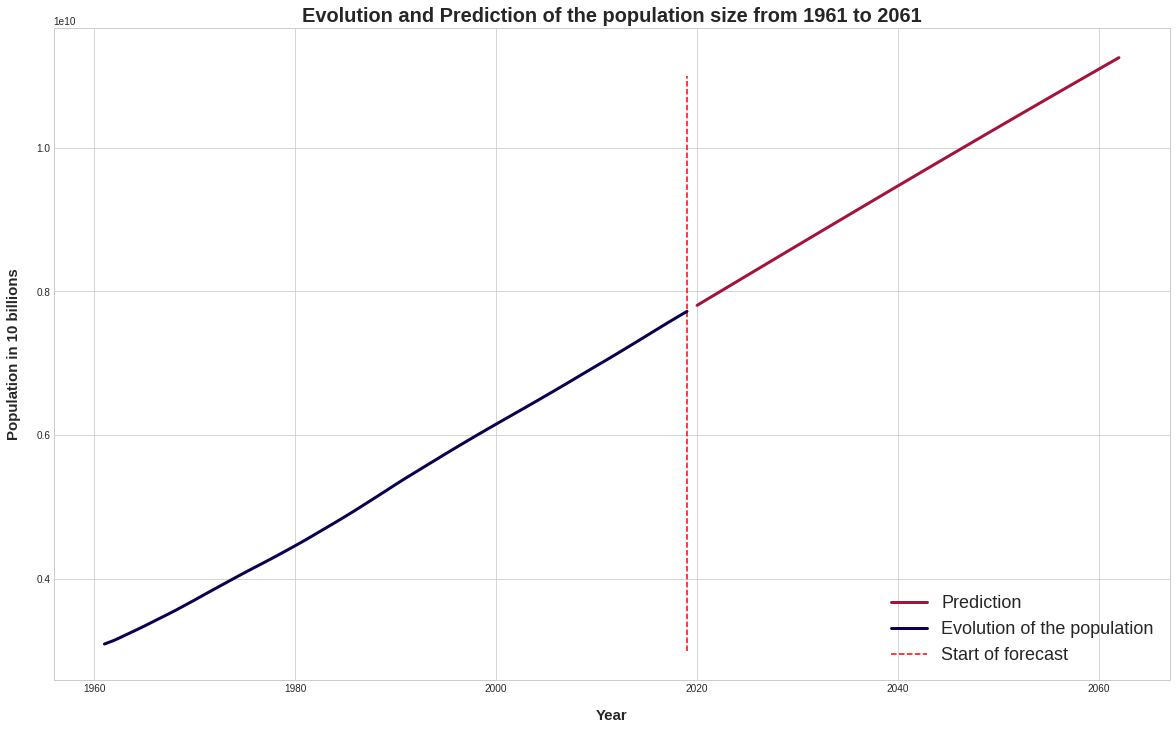

In [ ]:
#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size from 1961 to 2061",fontsize=20,fontweight=600)
#ax_P.set_xticks([i*2 for i in range(0,30)])
#ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

plt.plot([2020 + i for i in range(43)],Pred_pop_size,linewidth=3,label="Prediction",color = "#a4133c")
plt.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")
plt.vlines(2019, 3000000000, 11000000000, linestyle='--', color='r', label='Start of forecast');
plt.legend(fontsize=18,loc=4)

# A beautiful line is then predicted with more than 10 billion people on Earth by 2050.

# Exponential smoothing
In order to compare our result with an another method, we are going to use Exponential smoothing for prediction

For our Exponential smoothing, we will use Holt's linear smoothing because our data have a downward trend and no seasonality!

In [ ]:
PercentGrowth = PercentGrowth.set_index("Year")
PercentGrowth.head(5)

,PercGrowth
Year,
1961-12-31,1.353920
1962-12-31,1.724198
1963-12-31,2.083131
1964-12-31,2.052951
1965-12-31,2.054892


In [ ]:
from statsmodels.tsa.holtwinters import Holt
df = PercentGrowth.copy()
train = df.iloc[:58, :]
test = df.iloc[58:, :]
train.index = pd.to_datetime(train.index,format="%Y")
test.index = pd.to_datetime(test.index,format="%Y")
pred = test.copy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


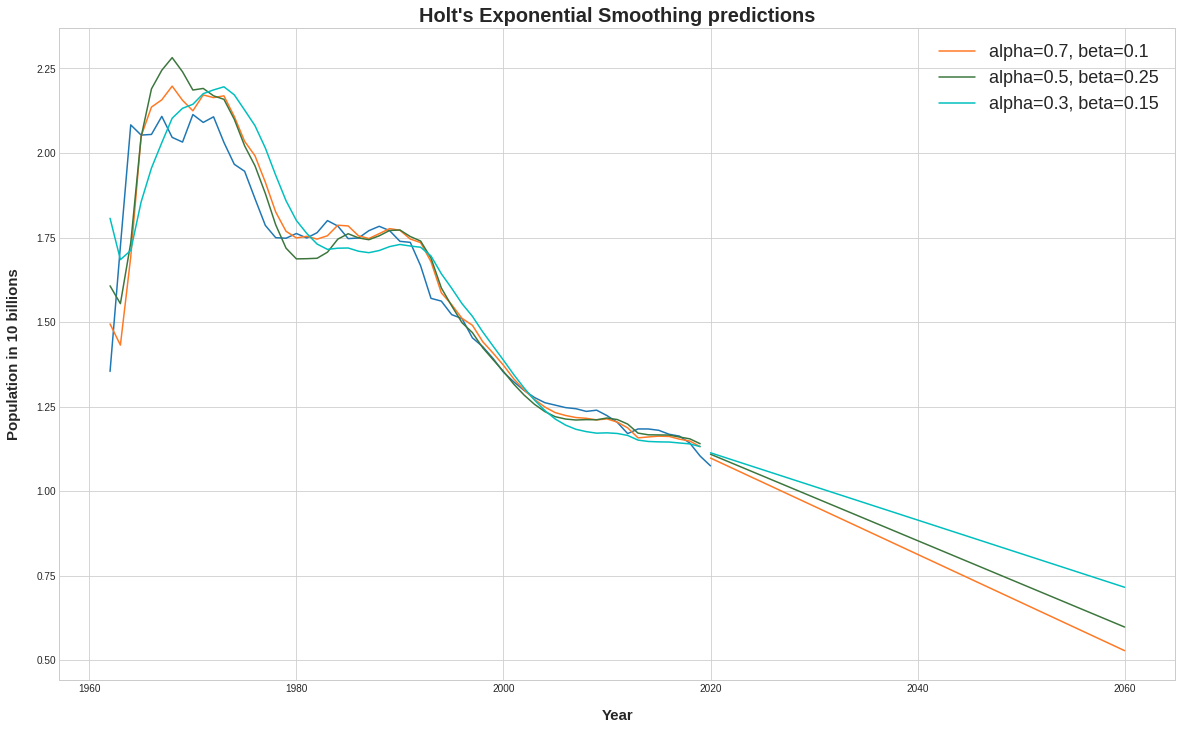

In [ ]:
model = Holt(np.asarray(train['PercGrowth']))
#model._index = pd.to_datetime(df.index)
fit1 = model.fit(smoothing_level=.7, smoothing_trend=.1)
pred1 = fit1.forecast(len(test)+40)
fit2 = model.fit(smoothing_level=.5, smoothing_trend=.25)
pred2 = fit2.forecast(len(test)+40)
fit3 = model.fit(smoothing_level=.3, smoothing_trend=.15)
pred3 = fit3.forecast(len(test)+40)


fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.index, df.values)
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot([pd.to_datetime(f'{year}-12-31T00:00:00.000000000') for year in range(2019,2060)], p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Holt's Exponential Smoothing predictions",fontsize=20,fontweight=600)
plt.legend(fontsize=18)

In [ ]:

PopIni = World["Population_2019"].values[0]
#orange one 
Pred_pop_size1 = []
for percGrowth in pred1:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size1.append(PopIni)

#green one
PopIni = World["Population_2019"].values[0]
Pred_pop_size2 = []
for percGrowth in pred2:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size2.append(PopIni)
    
#blue one
PopIni = World["Population_2019"].values[0]
Pred_pop_size3 = []
for percGrowth in pred3: 
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size3.append(PopIni)

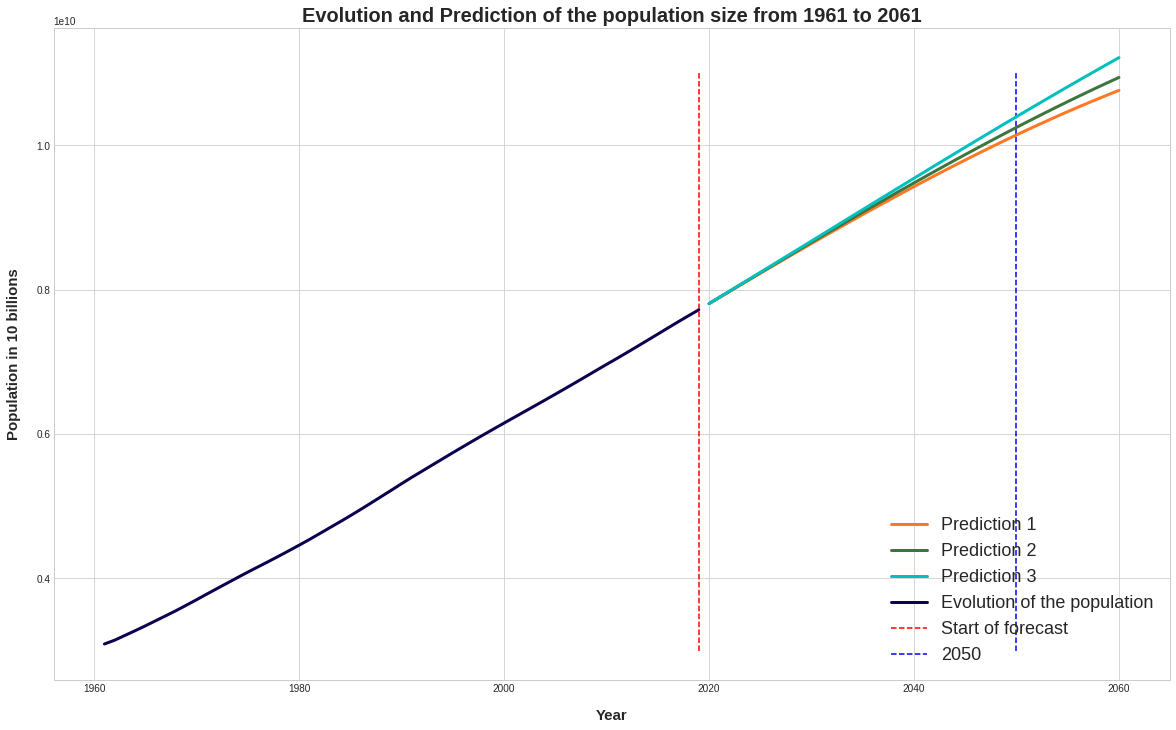

In [ ]:
#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size from 1961 to 2061",fontsize=20,fontweight=600)

plt.plot([2020 + i for i in range(41)],Pred_pop_size1,linewidth=3,label="Prediction 1",color = "#ff7823")
plt.plot([2020 + i for i in range(41)],Pred_pop_size2,linewidth=3,label="Prediction 2",color = "#3c763d")
plt.plot([2020 + i for i in range(41)],Pred_pop_size3,linewidth=3,label="Prediction 3 ",color = "c")
plt.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")
plt.vlines(2019, 3000000000, 11000000000, linestyle='--', color='r', label='Start of forecast');

plt.vlines(2050, 3000000000, 11000000000, linestyle='--', color='b', label='2050');
plt.legend(fontsize=18,loc=4)

# **With this method, we find also a result between 10 and 10.5 billions people by 2050 !!**